Experimental probability of Company B's Bus arriving first: 0.368044
Theoretical probability of Company B's Bus arriving first: 0.368


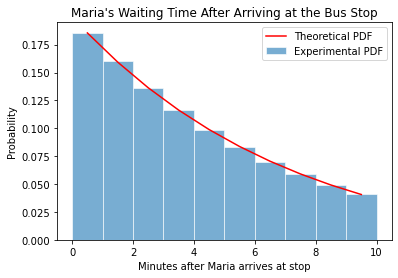

In [41]:
#Problem 1
import scipy.stats as sts 
import numpy as np 
import matplotlib.pyplot as plt

trials = 1000000 
#generate certain number of random variables from their respective distributions
a = sts.uniform(0, 10).rvs(trials) 
b = sts.expon(scale=10).rvs(trials) 
#counter and a list to store values
firsts = 0 
bus_arrivals = [] 
#for each trial determine which bus comes first and store the result, count the number of times bus B comes first
for i in range(trials): 
    if a[i]>b[i]: 
        firsts += 1 
        bus_arrivals.append(b[i]) 
    else: 
        bus_arrivals.append(a[i]) 
 
print("Experimental probability of Company B's Bus arriving first:", firsts/trials) 
print("Theoretical probability of Company B's Bus arriving first:", 0.368) 
 
#plot experimental and theoretical data
mins = np.arange(0.5, 10.5, 1) 
probs = [np.exp(-i/10)*(1/5-i/100) for i in x] 
plt.hist(t, density=True, label='Experimental PDF', edgecolor='white', alpha = 0.6) 
plt.plot(mins, probs, label='Theoretical PDF', color='red') 
plt.title("Maria's Waiting Time After Arriving at the Bus Stop") 
plt.xlabel('Minutes after Maria arrives at stop') 
plt.ylabel('Probability') 
plt.legend() 
plt.show()

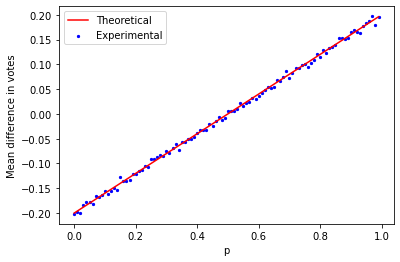

In [30]:
#Problem 2
import scipy.stats as sts 
import numpy as np 
import matplotlib.pyplot as plt

#number of trials
trials=10000

# array of different p values
p=np.arange(0, 1, 0.01)
#value of lambda of my choice 
l=0.2
#list to store mean values
means = []


# iterate over p values
for i in range(len(p)):
# iterate over trials and generate 1000 random variables from Poisson distribution
    n=sts.poisson(l).rvs(trials)
    differences = [] #list to store difference between votes for and again 
    for h in range(trials):
        votes_for=0 #count votes for 
        votes_against=0 #count votes against
# iterate over number of voters 
        for j in range(n[h]):
# classify votes as for and against based on the probability
            if np.random.uniform()< p[i]:
                votes_for+=1
            else:
                votes_against+=1

# find difference in votes for each trial and append to a list
        differences.append(votes_for-votes_against)
#compute means of differences
    means.append(np.mean(differences))
# plot p values against mean of voting difference with experimental and theoretical results
plt.scatter(p, means, c='blue', s=5,label='Experimental')
plt.plot(p, [l*(2*i-1) for i in p], c='red',label='Theoretical')
plt.xlabel('p')
plt.ylabel('Mean difference in votes')
plt.legend()
plt.show()

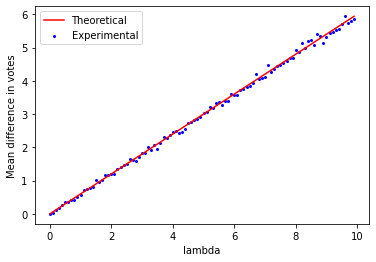

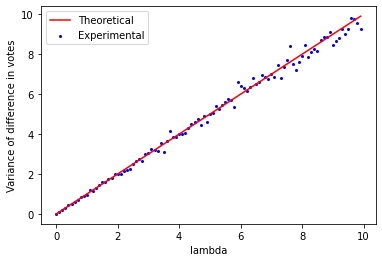

In [33]:
import scipy.stats as sts 
import numpy as np 
import matplotlib.pyplot as plt

trials=1000

# array of different lambda values
l=np.arange(0, 10, 0.1)
#chosen p value and lists for means and variances
p=0.8
means = []
variances = []


# iterate over l values
for i in range(len(l)):
# iterate over trials and generate random variables from Poisson
    n=sts.poisson(l[i]).rvs(trials)
    differences = []
    for h in range(trials):
        votes_for=0 #count votes for 
        votes_against=0 #count votes against
# iterate over number of voters 
        for j in range(n[h]):
# classify votes
            if np.random.uniform()< p:
                votes_for+=1
            else:
                votes_against+=1

# find difference in votes for each trial and append to a different list
        differences.append(votes_for-votes_against)
# append means and variances values to respective lists
    means.append(np.mean(differences))
    variances.append(np.var(differences))
    

# plot lambda values against mean of voting difference
plt.scatter(l, means, c='blue', s=4,label='Experimental')
plt.plot(l, [i*(2*p-1) for i in l], c='red',label='Theoretical')
plt.xlabel('lambda')
plt.ylabel('Mean difference in votes')
plt.legend()
plt.show()
# plot lambda values against varience of voting difference
plt.scatter(l, variances, c='blue', s=4,label='Experimental')
plt.plot(l, [i for i in l], c='red',label='Theoretical')
plt.xlabel('lambda')
plt.ylabel('Variance of difference in votes')
plt.legend()
plt.show()

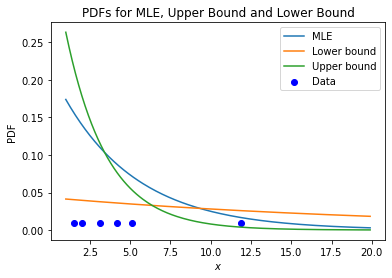

In [48]:
x = [1.5, 2.0, 3.1, 4.2, 5.1, 11.9]

mle = len(x)/sum(x)
lower_bound = mle*(1-1.96/(len(x)**0.5))
upper_bound = mle*(1+1.96/(len(x)**0.5))

p = np.arange(1, 20, 0.1)
plt.plot(p, sts.expon(scale=1/mle).pdf(p), label = 'MLE')
plt.plot(p, sts.expon(scale=1/lower_bound).pdf(p), label='Lower bound')
plt.plot(p, sts.expon(scale=1/upper_bound).pdf(p), label='Upper bound')
plt.scatter(x, [0.01]*len(x), c='blue', label='Data')
plt.legend()
plt.title('PDFs for MLE, Upper Bound and Lower Bound')
plt.xlabel('$x$')
plt.ylabel('PDF')
plt.show()

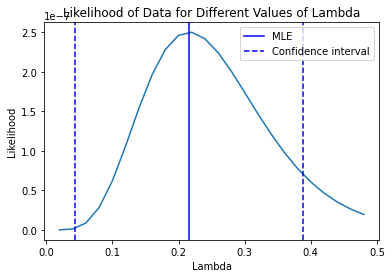

In [47]:
ls = np.arange(0.02, 0.5, 0.02)
probs = []

for l in ls:
    p = 1
    for i in x:
        p *= sts.expon(scale=1/l).pdf(i)
    probs.append(p)
    
plt.plot(ls, probs)
plt.axvline(mle, c='blue', label='MLE')
plt.axvline(lower_bound, linestyle='--', c='blue', label='Confidence interval')
plt.axvline(upper_bound, linestyle='--', c='blue')
plt.ylabel('Likelihood')
plt.xlabel('Lambda')
plt.title('Likelihood of Data for Different Values of Lambda')
plt.legend()
plt.show()